Image shape: (1024, 1024)


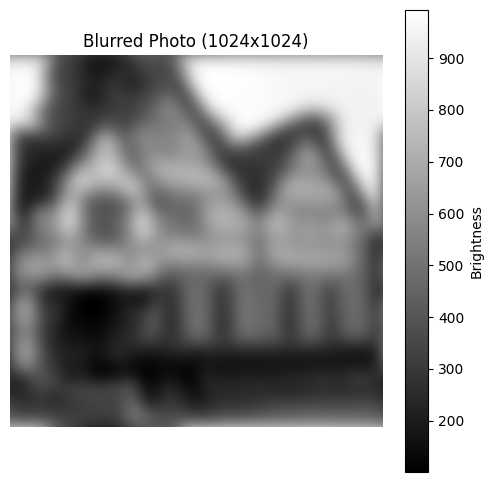

In [20]:

import numpy as np
import matplotlib.pyplot as plt


blurred = np.loadtxt("blur.txt")

print("Image shape:", blurred.shape)  


plt.figure(figsize=(6,6))
plt.imshow(blurred, cmap="gray", origin="upper")
plt.title("Blurred Photo (1024x1024)")
plt.colorbar(label="Brightness")
plt.axis("off")
plt.show()


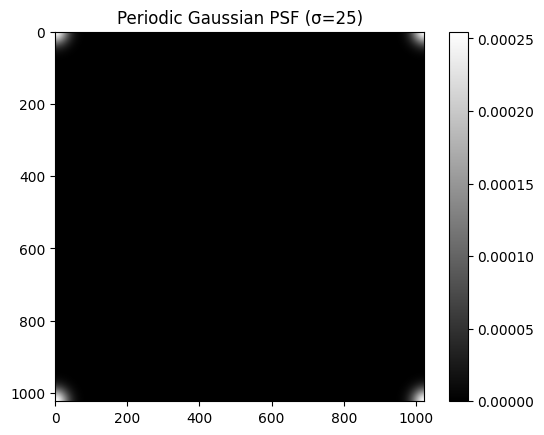

In [21]:

import numpy as np
import matplotlib.pyplot as plt


N = 1024
sigma = 25

# Coordinates: origin at (0,0) = upper-left corner
x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y, indexing="ij")

# Periodic distances 
dx = np.minimum(X, N - X)
dy = np.minimum(Y, N - Y)

# Gaussian PSF
psf = np.exp(-(dx**2 + dy**2) / (2 * sigma**2))
psf /= psf.sum()   # normalize

plt.imshow(psf, cmap="gray", origin="upper")
plt.title("Periodic Gaussian PSF (σ=25)")
plt.colorbar()
plt.show()


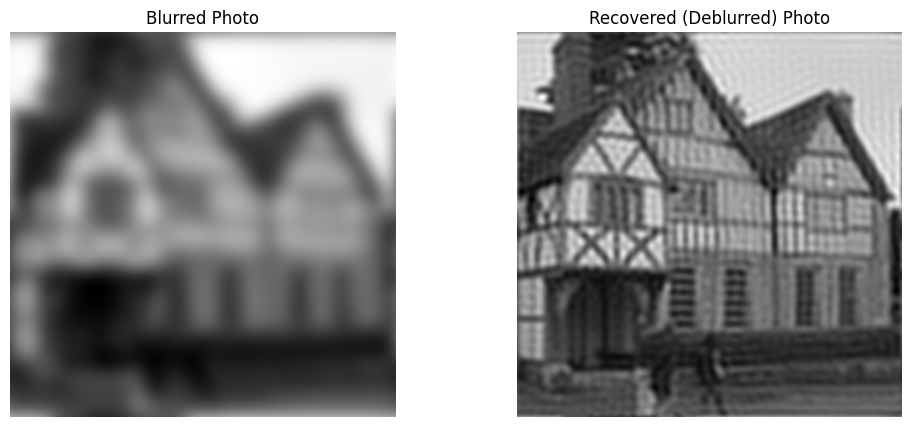

In [30]:

import numpy as np
import matplotlib.pyplot as plt

# Load blurred image (1024x1024 grid)
blurred = np.fromfile("blur.txt", sep=" ").reshape((1024, 1024))

N = 1024
sigma = 25

# Build PSF
x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y, indexing="ij")
dx = np.minimum(X, N - X)
dy = np.minimum(Y, N - Y)
psf = np.exp(-(dx**2 + dy**2) / (2 * sigma**2))
psf /= psf.sum()

# Fourier transforms
F_blur = np.fft.rfft2(blurred)
F_psf  = np.fft.rfft2(psf)

# Avoid division by small numbers
eps = 1e-8
mask = np.abs(F_psf) > eps
F_recovered = np.zeros_like(F_blur, dtype=complex)
F_recovered[mask] = F_blur[mask] / F_psf[mask]
F_recovered[~mask] = F_blur[~mask]

# Inverse transform
recovered = np.fft.irfft2(F_recovered, s=blurred.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(blurred, cmap="gray", origin="upper")
plt.title("Blurred Photo")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(recovered, cmap="gray", origin="upper")
plt.title("Recovered (Deblurred) Photo")
plt.axis("off")

plt.show()
